In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
train=pd.read_csv("C:\\Users\\Aysha Thuhfa\\Desktop\\Housing.csv")

In [11]:
train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
train.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [13]:
train.shape

(1090, 13)

In [14]:
train.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,1.090000e+03,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.869581e+06,2169.144402,0.737725,0.502239,0.867094,0.861190
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [15]:
train.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [16]:
train=pd.DataFrame(train)
train.replace({'yes': 1, 'no': 0, 'furnished': 1, 'semi-furnished': 0.5, 'unfurnished': 0}, inplace=True)
train

C:\Users\Aysha Thuhfa\AppData\Local\Temp\ipykernel_19004\2227823781.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train.replace({'yes': 1, 'no': 0, 'furnished': 1, 'semi-furnished': 0.5, 'unfurnished': 0}, inplace=True)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,1820000,3000,2,1,1,1,0,1,0,0,2,0,0.0
1086,1767150,2400,3,1,1,0,0,0,0,0,0,0,0.5
1087,1750000,3620,2,1,1,1,0,0,0,0,0,0,0.0
1088,1750000,2910,3,1,1,0,0,0,0,0,0,0,1.0


In [17]:
numeric_columns = train.select_dtypes(include=[np.number])
train_numeric = train[numeric_columns.columns]

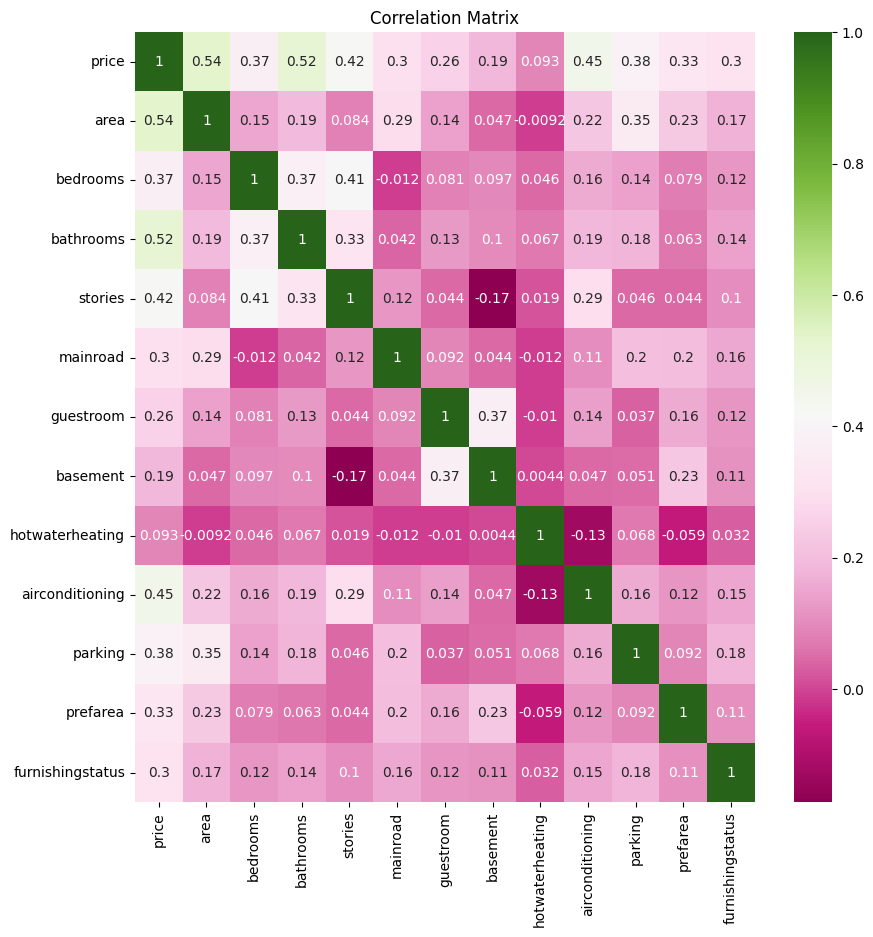

In [18]:
corr_matrix=train_numeric.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,cmap='PiYG')
plt.title("Correlation Matrix")
plt.show()

In [19]:
X=train[['area','bedrooms','bathrooms','stories','parking','mainroad','guestroom','basement','hotwaterheating','airconditioning',
         'prefarea','furnishingstatus']]
y=train['price']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train ,X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [25]:
print("Mean Squared Error",mse)
print("R-squared",r2)

Mean Squared Error 1015729175091.931
R-squared 0.7002776449154093


In [26]:
model.score(X_test,y_test)

0.7002776449154093

Text(0.5, 1.0, 'Actual Prices vs. Predicted Prices')

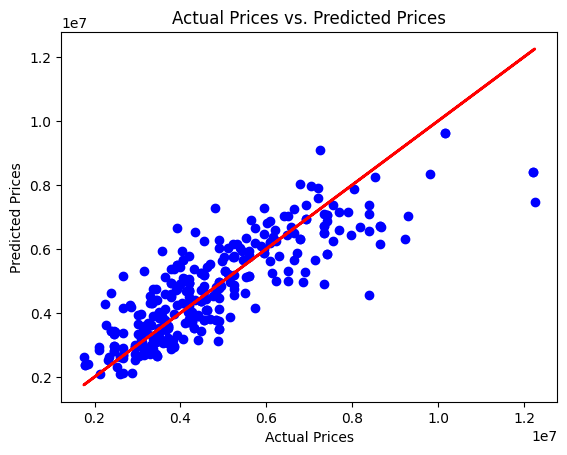

In [27]:
plt.figure
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')